# 行列式の幾何的な解釈：体積拡大率

2つのベクトルが四角形を表すとみなす。この四角形を変形させる行列$A$があったとき、変換後の四角形の面積はもとの面積の$\text{det}(A)$倍である、と解釈できる

（行列式の値が正の値のとき。負の場合は軸が反転して裏返しになる。$\text{det}(A)=0$ならぺちゃんこに潰れている状態）

例えば$I \in \mathbb{R}^{2\times 2}$が構成する四角形に$A$を乗じて$AI=A$とするときの拡大率ともいえるし、$A$の面積とも言える

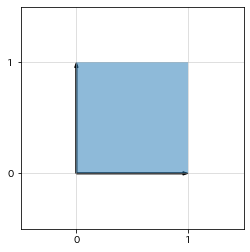

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import japanize_matplotlib

e0 = [1, 0]
e1 = [0, 1]

I = np.array([e0, e1])
O = np.array([0, 0])

fig, ax = plt.subplots(figsize=[4, 4], dpi=72)
ax.grid(True, alpha=.5)
ax.arrow(*O, *e0, width=0.01, color="black", length_includes_head=True)
ax.arrow(*O, *e1, width=0.01, color="black", length_includes_head=True)
ax.fill_between(x=[0, 1], y1=0, y2=1, alpha=.5)

ax.set(xlim=[-0.5, 1.5], ylim=[-0.5, 1.5], xticks=[0, 1], yticks=[0, 1])
fig.show()

適当な行列$A$で変換するとこうなる

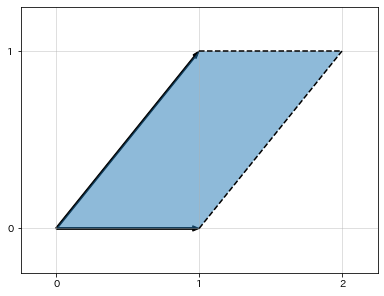

In [3]:
A = np.array([
    [1, 1],
    [0, 1]
])
e0_ = A @ e0
e1_ = A @ e1
y_ = e0_ + e1_

fig, ax = plt.subplots(dpi=72)
ax.grid(True, alpha=.5)
ax.arrow(0, 0, *e0_, width=0.01, color="black", length_includes_head=True)
ax.arrow(0, 0, *e1_, width=0.01, color="black", length_includes_head=True)

d = np.array([e0_, y_])
ax.plot(d[:, 0], d[:, 1], color="black", linestyle="--")
d = np.array([e1_, y_])
ax.plot(d[:, 0], d[:, 1], color="black", linestyle="--")

x = np.linspace(0, y_[0], 11)
ax.fill_between(x=x, y1=[max(e - 1, 0) for e in x], y2=[min(e, 1) for e in x], alpha=.5)
ax.set(xlim=[-0.25, 2.25], ylim=[-0.25, 1.25], xticks=[0, 1, 2], yticks=[0, 1])
fig.show()

平行四辺形の面積は底辺×高さ。今回は底辺も高さも1なので、面積は変わっていない。

この行列$A$の行列式は1になる

In [4]:
np.linalg.det(A)

1.0

参考：[Chapter 6 行列式 | 線形代数のエッセンス - YouTube](https://www.youtube.com/watch?v=K8axNorb1CU)

### （例）次のような行列の場合は…？

$$
A = 
\begin{pmatrix}
1 & 2\\
1 & 3
\end{pmatrix}
, \hspace{2em}
B = 
\begin{pmatrix}
1 & 102\\
1 & 103
\end{pmatrix}
\\
\text{det}(A) = 3 - 2 = 1
, \hspace{2em}
\text{det}(B) = 103 - 102 = 1
$$


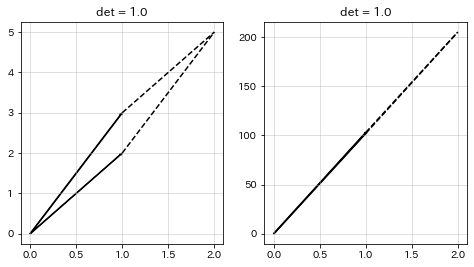

In [5]:
A = np.array([
    [1, 2],
    [1, 3]
])
B = np.array([
    [1, 102],
    [1, 103]
])
fig, axes = plt.subplots(ncols=2, figsize=[8, 4], dpi=72)

for X, ax in zip([A, B], axes):
    x0_ = X[0]
    x1_ = X[1]
    y_ = x0_ + x1_
    ax.grid(True, alpha=.5)
    ax.arrow(0, 0, *x0_, width=0.01, color="black", length_includes_head=True)
    ax.arrow(0, 0, *x1_, width=0.01, color="black", length_includes_head=True)

    d = np.array([x0_, y_])
    ax.plot(d[:, 0], d[:, 1], color="black", linestyle="--")
    d = np.array([x1_, y_])
    ax.plot(d[:, 0], d[:, 1], color="black", linestyle="--")

    x = np.linspace(0, y_[0], 11)
    ax.set(title=f"det = {np.linalg.det(X)}")
fig.show()

## どうしてそうなるのか

$\boldsymbol{a}, \boldsymbol{b}$ を平面 $\boldsymbol{R}^2$ の 2 つのベクトルとする。
$O$ を座標の原点とし、 $A, B$ を $\overrightarrow{O A}$ $=\boldsymbol{a}, \overrightarrow{O B}=\boldsymbol{b}$ であるような点とする。
$O A, O B$ を 2 辺とする平行四辺形 $O A P B$ を、$\boldsymbol{a}, \boldsymbol{b}$を2辺とする平行四辺形という。その面積Sを求めたい。


もし$\boldsymbol{a}, \boldsymbol{b}$が1次従属なら、OAPBは1つの線分になるので$S=0$

$\boldsymbol{a}, \boldsymbol{b}$が1次独立のとき、$\boldsymbol{a}, \boldsymbol{b}$のなす角を$\theta$とすれば、$B$から辺$OA$に下した垂線の長さは$|\boldsymbol{b}| \sin \theta$であるから、面積は底辺×高さで

$$
S = \|\boldsymbol{a}\| \|\boldsymbol{b}\| \sin \theta
$$

両辺を2乗にする

$$
S^2 = \|\boldsymbol{a}\|^2 \|\boldsymbol{b}\|^2 \sin^2 \theta
$$

$\sin ^2 \theta=1-\cos ^2 \theta$ であり $\cos \theta = \frac{ \boldsymbol{a} \cdot \boldsymbol{b} }{ \|\boldsymbol{a}\| \|\boldsymbol{b}\| }$なので

$$
\begin{align}
S^2
&= \|\boldsymbol{a}\|^2 \|\boldsymbol{b}\|^2 \sin^2 \theta\\
&= \|\boldsymbol{a}\|^2 \|\boldsymbol{b}\|^2 (1 - \cos ^2 \theta)\\
&= \|\boldsymbol{a}\|^2 \|\boldsymbol{b}\|^2 \left(1 - \frac{ (\boldsymbol{a} \cdot \boldsymbol{b})^2 }{ \|\boldsymbol{a}\|^2 \|\boldsymbol{b}\|^2 }\right)\\
&= \|\boldsymbol{a}\|^2 \|\boldsymbol{b}\|^2 - (\boldsymbol{a} \cdot \boldsymbol{b})^2
\end{align}
$$

$\boldsymbol{a} = (a_1, a_2)^T, \boldsymbol{b}=(b_1, b_2)^T$とすれば、

$$
\begin{align}
S^2
= \|\boldsymbol{a}\|^2 \|\boldsymbol{b}\|^2 - (\boldsymbol{a} \cdot \boldsymbol{b})^2
&= \left(a_1^2 + a_2^2\right)\left(b_1^2 + b_2^2\right)-\left(a_1 b_1+a_2 b_2\right)^2 \\
&= \left(a_1 b_2-a_2 b_1\right)^2\\
\end{align}
$$

ゆえに

$$
S = |a_1 b_2-a_2 b_1|
$$

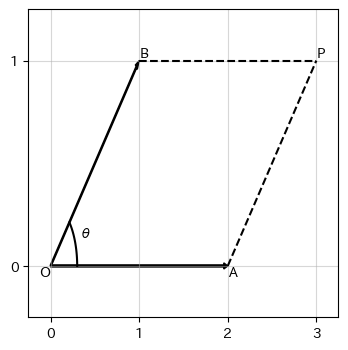

In [63]:
A = np.array([
    [2, 1],
    [0, 1]
])
e0_ = A @ e0
e1_ = A @ e1
y_ = e0_ + e1_

fig, ax = plt.subplots(figsize=[4, 4], dpi=100)
ax.grid(True, alpha=.5)
ax.arrow(0, 0, *e0_, width=0.01, color="black", length_includes_head=True)
ax.arrow(0, 0, *e1_, width=0.01, color="black", length_includes_head=True)

ax.text(0, 0, "O", ha="right", va="top")
ax.text(*e0_, "A", ha="left", va="top")
ax.text(*e1_, "B", ha="left", va="bottom")
ax.text(*y_, "P", ha="left", va="bottom")

d = np.array([e0_, y_])
ax.plot(d[:, 0], d[:, 1], color="black", linestyle="--")
d = np.array([e1_, y_])
ax.plot(d[:, 0], d[:, 1], color="black", linestyle="--")

# x = np.linspace(0, y_[0], 11)
# ax.fill_between(x=x, y1=[max(e - 1, 0) for e in x], y2=[min(e, 1) for e in x], alpha=.5)
ax.set(xlim=[-0.25, 3.25], ylim=[-0.25, 1.25],
       xticks=range(4), yticks=range(2))


# Drawing the angle θ near O with an arc
ax.text(0.4, 0.15, "θ", ha="center", va="center")
angle = np.linspace(0, np.arctan2(e1_[0], e1_[1]), 100)  # Calculate the angle of OB relative to the x-axis
radius = 0.3  # Radius of the arc for angle representation
x_arc = radius * np.cos(angle)
y_arc = radius * np.sin(angle)
ax.plot(x_arc, y_arc, 'k-')  

fig.show()

In [1]:
import numpy as np

np.sin(np.pi) - np.cos(np.pi)

1.0000000000000002

In [4]:
- np.cos(np.pi) + np.sin(np.pi) 

1.0000000000000002